In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

# Bank Customer Churn Dataset
file_path = 'churn.csv'
df = pd.read_csv(file_path)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style='text-align: center; color:#003049'>Understanding Customer Churn: Analyzing Gender Disparities, Age Impact, and ML Predictions in Banking</h1>
<hr><br>
<h4>The aim of this project is to analyze customer churn trends within the bank, investigating factors such as gender disparities, age demographics, credit scores, and the performance of machine learning models in predicting customer attrition. </h4><br><br>
<ul>
<li>RowNumber—corresponds to the record (row) number and has no effect on the output. </li>
<li>CustomerId—contains random values and has no effect on customer leaving the bank. </li>
<li>Surname—the surname of a customer has no impact on their decision to leave the bank. </li>
<li>CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.</li>
<li>Geography—a customer’s location can affect their decision to leave the bank. </li>
<li>Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank. </li>
<li>Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.</li>
<li>Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.<ul>
<li>Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.</li>
<li>NumOfProducts—refers to the number of products that a customer has purchased through the bank.</li>
<li>HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.</li>
<li>IsActiveMember—active customers are less likely to leave the bank.</li>
<li>EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.</li>
<li>Exited—whether or not the customer left the bank.</li></ul></li>
</ul>
    


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h1 style='color: #003049;'>Data Transformation</h1>

In [9]:
# Dropping the "Row Number" we already have this information on index
df.drop(["RowNumber"], axis=1, inplace=True)

# This is a category
df["Gender"] = df["Gender"].astype("category") 

In [10]:
df['Exited'] = df['Exited'].map({1: 'Yes', 0: 'No'})

<h1 style='color: #003049;'>Feature Engineering</h1>

<h3>Credit Score Segmentation</h3>

<p>According to FICO Credit Score:</p>
   <ul>
        <li>
            <strong>800 to 850: Excellent Credit Score</strong>
            <p>Individuals in this range are considered to be low-risk borrowers. They may have an easier time securing a loan than borrowers with lower credit scores.</p>
        </li>
      
 <li>
            <strong>670 to 799: Good Credit Score</strong>
            <p>Lenders generally view those with credit scores of 670 and up as acceptable or lower-risk borrowers.</p>
        </li>
        <li>
            <strong>580 to 669: Fair Credit Score</strong>
            <p>Individuals in this category are often considered “subprime” borrowers. Lenders may consider them higher-risk, and they may have trouble qualifying for new credit.</p>
        </li>
        <li>
            <strong>300 to 579: Poor Credit Score</strong>
            <p>Individuals in this range often have difficulty being approved for new credit. If you find yourself in the poor category, it's likely you'll need to take steps to improve your credit scores before you can secure any new credit.</p>
        </li>
    </ul>

In [11]:
# FICO SCORE Segmentiation 
cr_bins = [300, 579, 669, 799, 850]
cr_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Segment the 'CreditScore' using pd.cut
df['CrScoreCategory'] = pd.cut(df['CreditScore'], bins=cr_bins, labels=cr_labels, right=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CrScoreCategory
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No,Excellent


<h3>Age Segmentation</h3>

In [12]:
age_bins = [18, 25, 35, 45, 55, 65, 100]  
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Segment the Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CrScoreCategory,AgeGroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,Fair,35-44
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,Fair,35-44
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,Poor,35-44
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No,Good,35-44
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No,Excellent,35-44


In [13]:
df.to_csv('rrr.csv', index=False)

<h1 style='color: #003049;'>Data Visualisation</h1>

<h3>Demographic Information</h3>

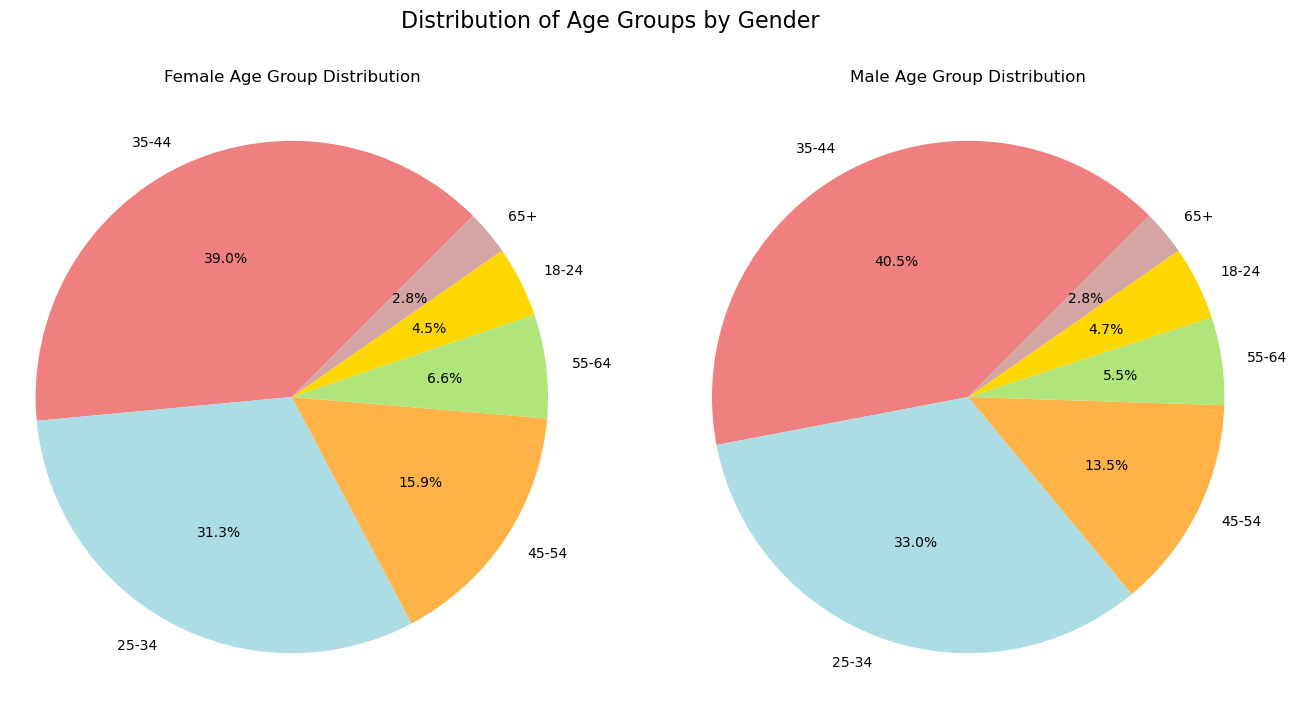

In [14]:
colors = ['#f08080', '#acdce4', '#ffb347', '#b0e57c', '#ffd700', '#d4a5a5']
sns.set_palette(colors)

age_counts_female = df[df["Gender"] == "Female"]['AgeGroup'].value_counts()
age_counts_male = df[df["Gender"] == "Male"]['AgeGroup'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8)) 

# FEMALE
ax1.pie(age_counts_female, labels=age_counts_female.index, autopct='%1.1f%%', startangle=45)
ax1.set_title('Female Age Group Distribution')
ax1.axis('equal') 

# MALE
ax2.pie(age_counts_male, labels=age_counts_male.index, autopct='%1.1f%%', startangle=45)
ax2.set_title('Male Age Group Distribution')
ax2.axis('equal')  

# PLT ADJUSTMENTS
plt.suptitle('Distribution of Age Groups by Gender', fontsize=16)
plt.show()

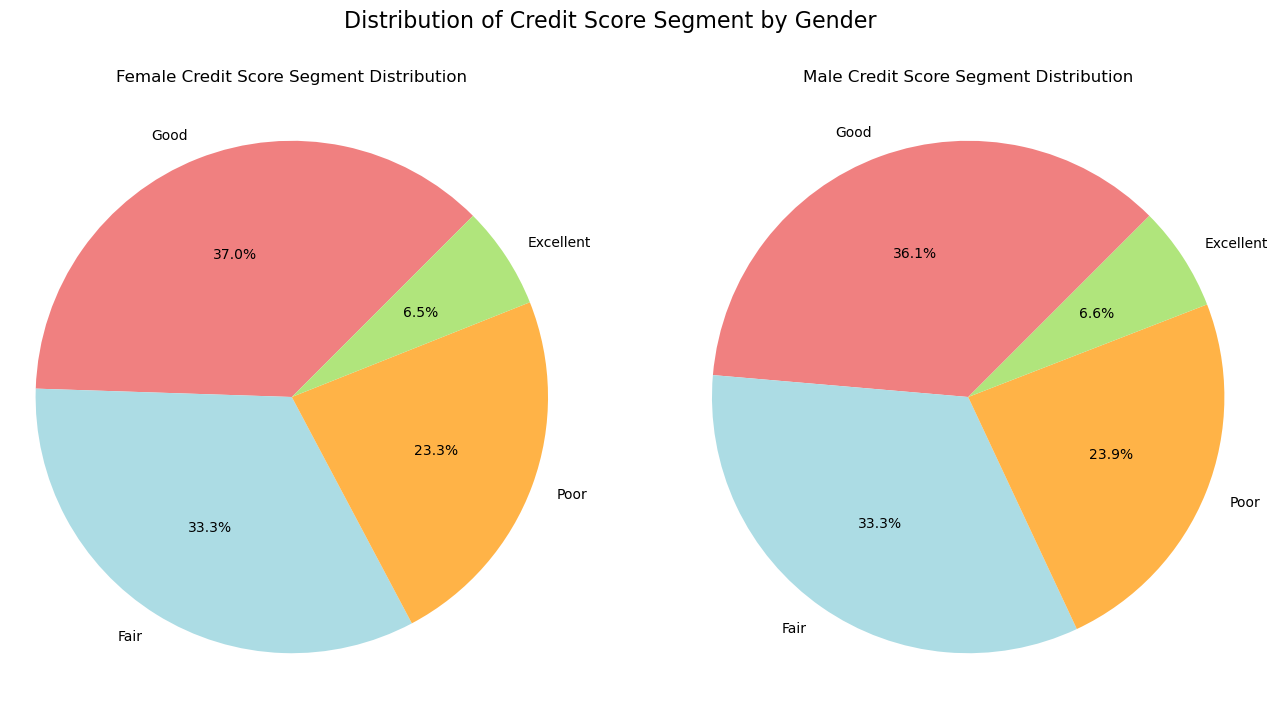

In [15]:
age_counts_female = df[df["Gender"] == "Female"]['CrScoreCategory'].value_counts()
age_counts_male = df[df["Gender"] == "Male"]['CrScoreCategory'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  
# FEMALE
ax1.pie(age_counts_female, labels=age_counts_female.index, autopct='%1.1f%%',startangle=45)
ax1.set_title('Female Credit Score Segment Distribution')
ax1.axis('equal')  

# MALES
ax2.pie(age_counts_male, labels=age_counts_male.index, autopct='%1.1f%%', startangle=45)
ax2.set_title('Male Credit Score Segment Distribution')
ax2.axis('equal')  

# PLT ADJUSTMENTS
plt.suptitle('Distribution of Credit Score Segment by Gender', fontsize=16)
plt.show()

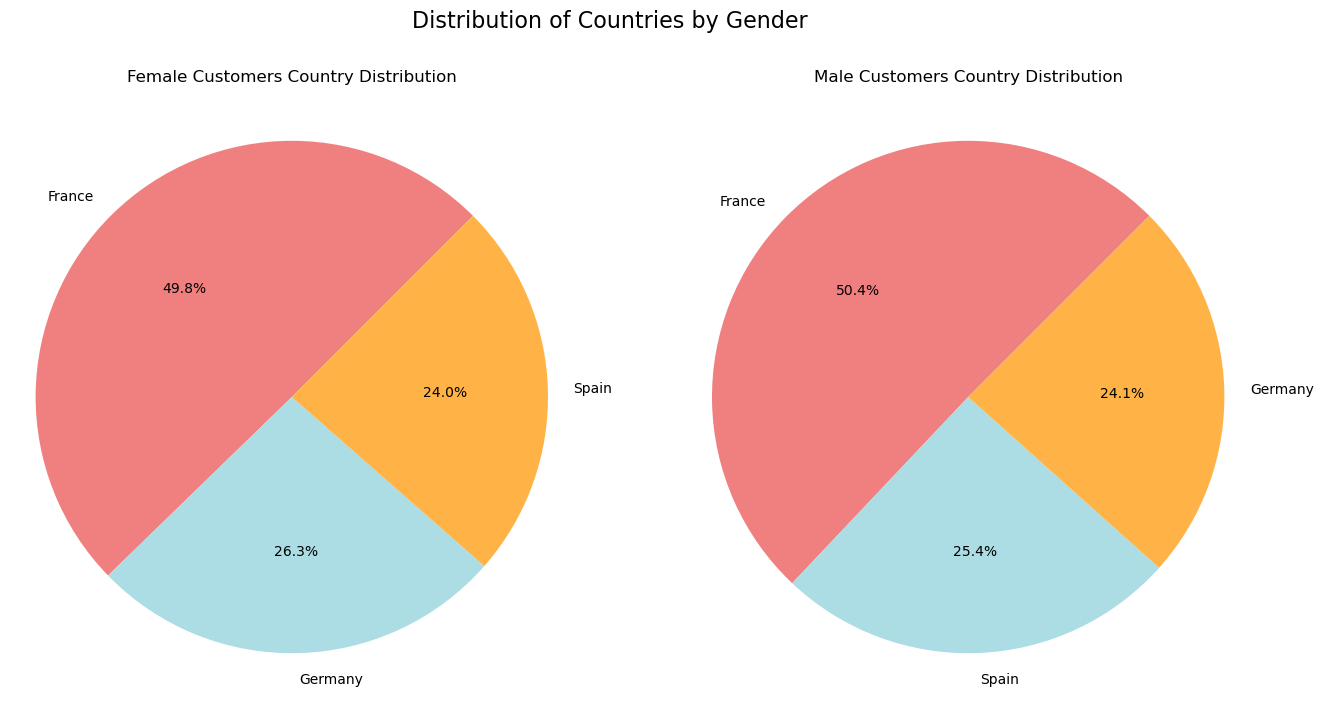

In [16]:
age_counts_female = df[df["Gender"] == "Female"]['Geography'].value_counts()
age_counts_male = df[df["Gender"] == "Male"]['Geography'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  
# FEMALE
ax1.pie(age_counts_female, labels=age_counts_female.index, autopct='%1.1f%%', startangle=45)
ax1.set_title('Female Customers Country Distribution')
ax1.axis('equal')  

# MALES
ax2.pie(age_counts_male, labels=age_counts_male.index, autopct='%1.1f%%', startangle=45)
ax2.set_title('Male Customers Country Distribution')
ax2.axis('equal')  

# PLT ADJUSTMENTS
plt.suptitle('Distribution of Countries by Gender', fontsize=16)
plt.show()

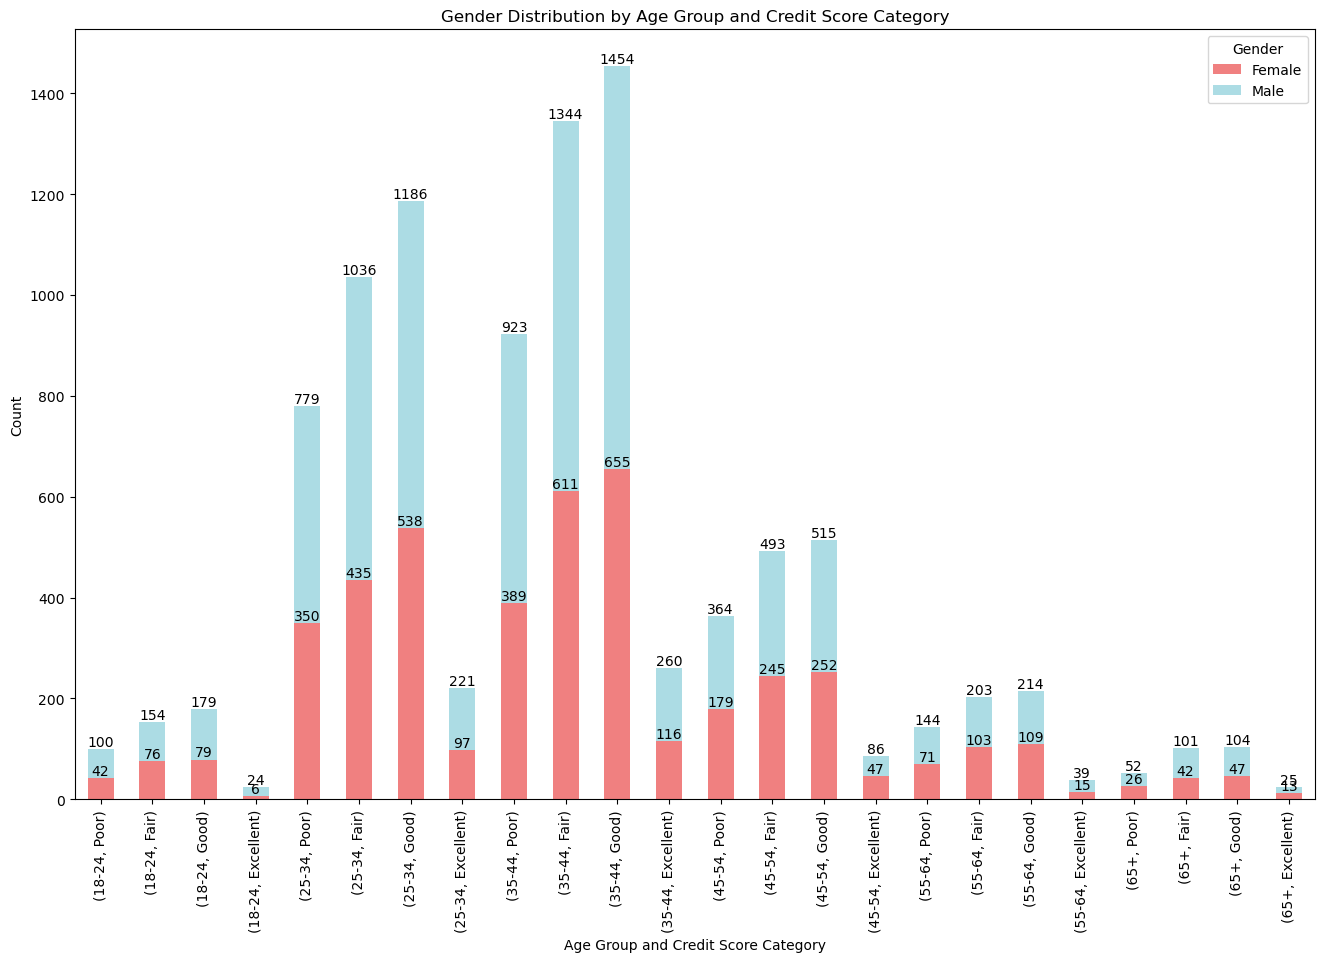

In [27]:
grouped_df = df.groupby(["AgeGroup", "CrScoreCategory"])["Gender"].value_counts().reset_index()
pivot_df = grouped_df.pivot_table(index=["AgeGroup", "CrScoreCategory"], columns="Gender", values="count", fill_value=0)


barplot = pivot_df.plot(kind="bar", stacked=True, figsize=(16, 10))

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)


plt.title("Gender Distribution by Age Group and Credit Score Category")
plt.xlabel("Age Group and Credit Score Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


<h3>Correlation</h3>

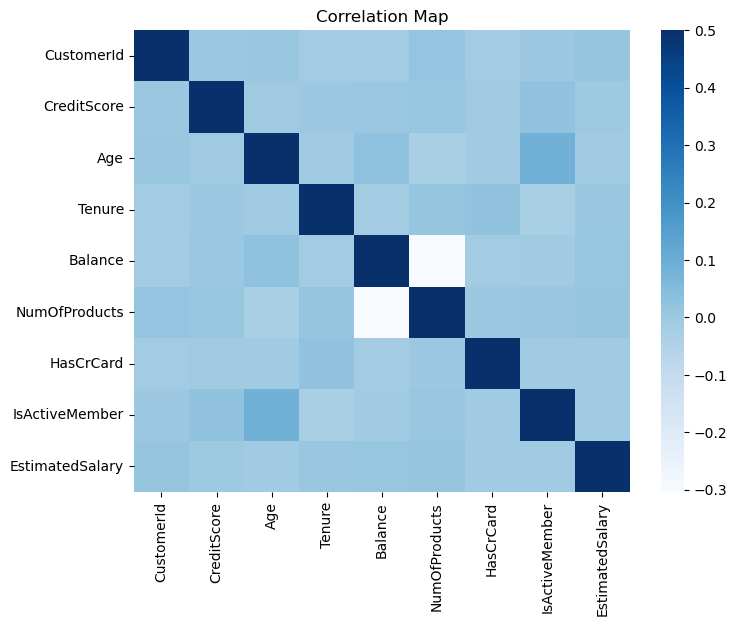

In [18]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=False, cmap='Blues', vmax=0.5)

plt.title('Correlation Map')
plt.show()

<h3>Customers That Exited</h3>

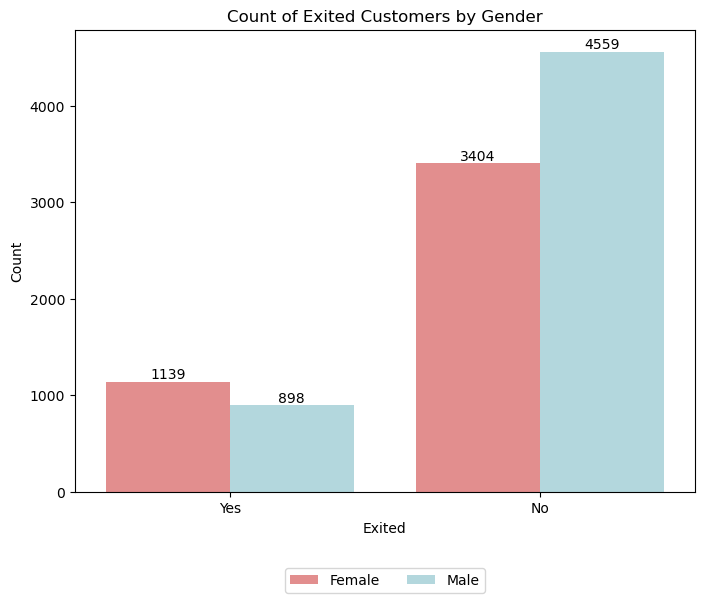

In [19]:
plt.figure(figsize=(8, 6)) 

barplot = sns.countplot(data=df, x="Exited", hue="Gender")

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)


plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count of Exited Customers by Gender")
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
plt.show()

<h3>Segment and Exit relation</h3>

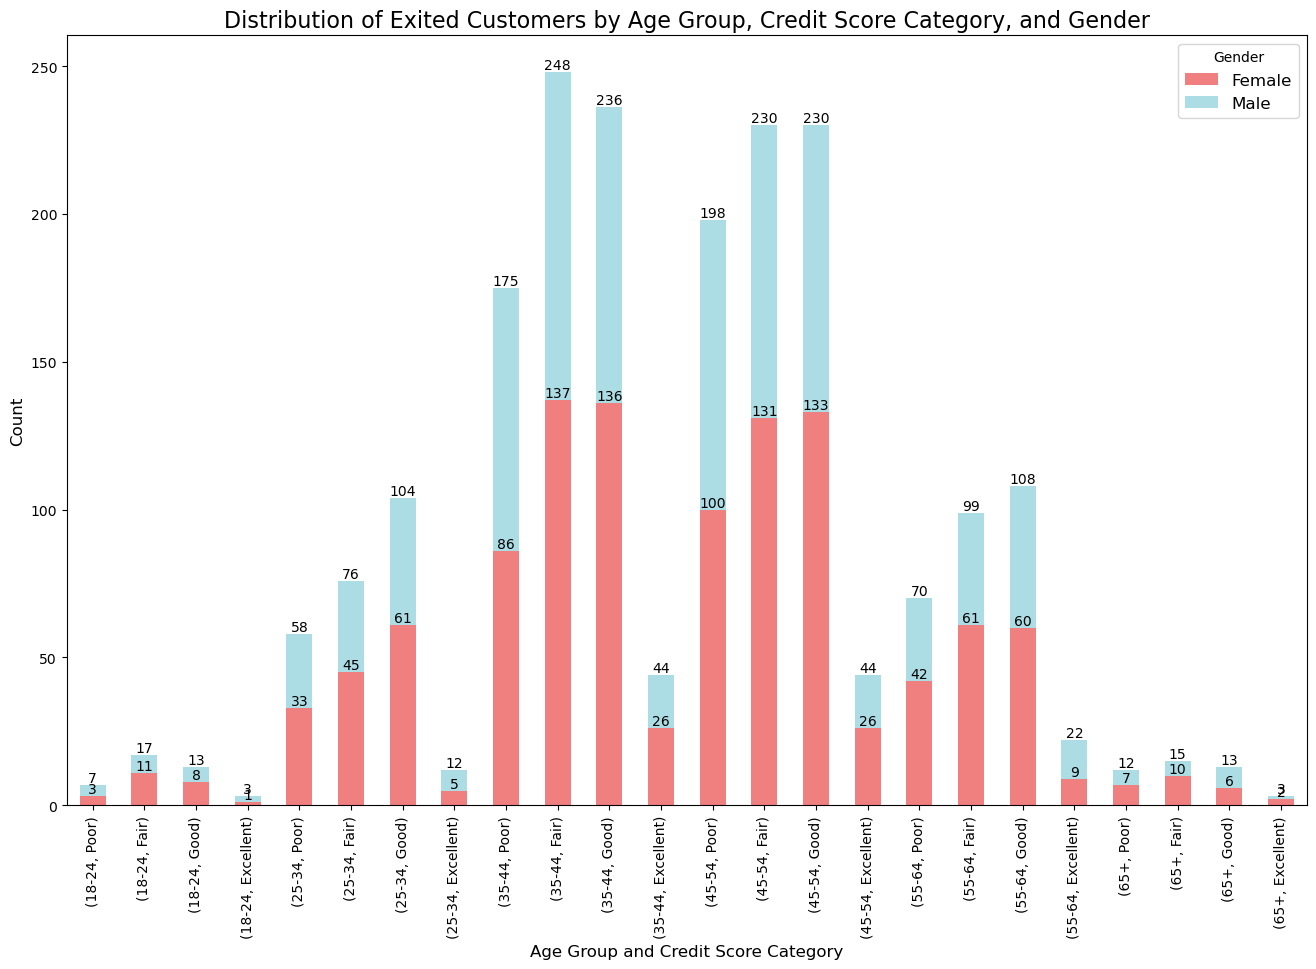

In [20]:
exited_df = df[df["Exited"] == "Yes"]
grouped_df = exited_df.groupby(["AgeGroup", "CrScoreCategory"])["Gender"].value_counts().reset_index()
pivot_df = grouped_df.pivot_table(index=["AgeGroup", "CrScoreCategory"], columns="Gender", values="count", fill_value=0)


barplot = pivot_df.plot(kind="bar", stacked=True, figsize=(16, 10))

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)


plt.title("Distribution of Exited Customers by Age Group, Credit Score Category, and Gender", fontsize=16)
plt.xlabel("Age Group and Credit Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender", fontsize=12)
plt.show()


<h3>Model Data Preparation</h3>

In [21]:
model_df = df

In [22]:
df_dummies = pd.get_dummies(model_df[["Gender", "Geography"]])

# Concatting the dummies with the model dataframe
model_df = pd.concat([model_df, df_dummies], axis=1)


In [23]:
# Train Set
X= model_df.drop(["CustomerId","Surname","Gender","Geography","CrScoreCategory","AgeGroup","Exited"], axis=1).values

# Target value
y= model_df["Exited"].values

<h3>Model Applying</h3>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 41)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree":DecisionTreeClassifier()}

results = []

# Model looping
for model in models.values():
	kf = KFold(n_splits=6, random_state = 41, shuffle=True)
	cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
	results.append(cv_results)


<h3>Model Results</h3>

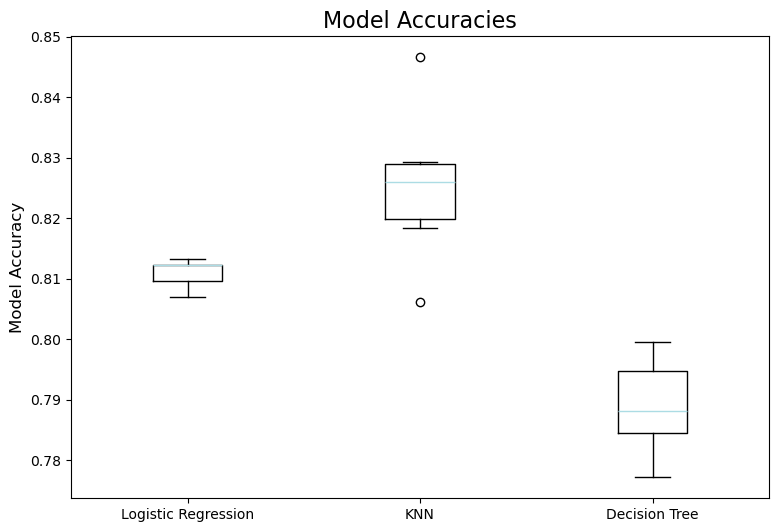

In [25]:
plt.figure(figsize=(9, 6)) 
plt.boxplot(results, labels=models.keys())
plt.title("Model Accuracies", fontsize=16)
plt.ylabel("Model Accuracy", fontsize=12)
plt.show()

In [26]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    y_pred = model.predict(X_test_scaled)
    print("\033[1m\n {} Test Set Accuracy: {} \n\033[0m".format(name, test_score))
    print("Classification Report for {}:\n".format(name))
    print(classification_report(y_test, y_pred))
    print("\n\n")




 Logistic Regression Test Set Accuracy: 0.812 

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          No       0.83      0.97      0.89      2383
         Yes       0.62      0.22      0.32       617

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000





 KNN Test Set Accuracy: 0.826 

Classification Report for KNN:

              precision    recall  f1-score   support

          No       0.85      0.94      0.90      2383
         Yes       0.63      0.38      0.47       617

    accuracy                           0.83      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000





 Decision Tree Test Set Accuracy: 0.798 

Classification Report for Decision Tree:

              precision    recall  f1-score   support

          No       0.88      0.87     

 <h1 style="color: red;  text-align: center;">Conclusion</h1>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="margin-bottom: 20px;">
            <h3>Gender Disparities:</h3>
            <p>A notable finding is that more females (1139) than males (898) exited the bank, despite more males (4559) than females (3404) staying. This suggests potential gender-specific trends in customer retention that merit further investigation.</p>
        </li>
        <li style="margin-bottom: 20px;">
            <h3>Age and Credit Score Impact:</h3>
            <p>The age group most likely to exit the bank is 35-44, particularly those with fair credit scores. Conversely, the 18-24 age group with excellent credit scores shows the least likelihood of exiting.</p>
        </li>
        <li style="margin-bottom: 20px;">
            <h3>Machine Learning Model Interpretation</h3>
            <p>Among the models tested to predict customers likely to leave the bank, KNN performed the best with an accuracy of <b>82.6%</b>. This means it correctly identifies about 83 out of 100 customers who might churn.</p>
        </li>
    </ul>